<a href="https://colab.research.google.com/github/Jagadish-24/Python-Machine-learning/blob/main/Learning_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OOPS Concepts Python

## Operator Overloading

In [ ]:
'''Demonstrate the use of operator overloading via special methods'''
class Vector:
  '''Represent a vector in multidimensional space'''
  def __init__(self,dim):
    '''Create a dim-dimensional vector of zeros'''
    self._coords = [0] * dim
  def __len__(self):
    '''Returns the dimension of the vector'''
    return len(self._coords)
  def __getitem__(self,index):
    '''Returns the coordinate at the corresponding index'''
    return self._coords[index]
  def __setitem__(self,index,value):
    '''Sets the given value at the given index'''
    self._coords[index] = value
  def __add__(self,other):
    '''Return the sum of two vectors'''
    if len(self) != len(other): # relies on __len__method - when ever len() method is called it is directed to __len__ method
      raise ValueError('dimensions must agree, pls check if both dimensions are the same')
    result = Vector(len(self)) #start with a vector of zeros
    for index in range(len(self)):
      result[index] = self[index] + other[index]
    return result
  def __eq__(self,other):
    '''Return TRUE if both vectors has the same values'''
    return self._coords == other._coords
  def __ne__(self,other):
    '''Return True if vector differs from other'''
    return not self == other
  def __str__(self):
    return '<' + str(self._coords[:]) + '>'
  def __iter__(self):
    return self

In [ ]:
v1 = Vector(3)
v1[0],v1[1],v1[2] = 5,8,7


## Iterators
1. An iterator for a collection provides one key behaviour : It supports a special method named `__next__` that returns the next element of a collection, if any, or raises a StopIteration exception to indicate that there are no further elements
2. Python also helps by providing an automatic iterator implementation for any class that defines both `__len__` and `__getitem__` methods

In [ ]:
#Iterators
''' In this class we explicitly define the iterator using next and iter methods'''
class SequenceIterator:
  '''an iterator for any of Python's Sequence Types'''
  def __init__(self,sequence):
    '''Create an iterator for the given sequence'''
    self._seq = sequence  # keep a reference to the underlying data
    self.index = -1       # initialize to -1 since it will increment to 0 on first call of next method
  def __next__(self):
    '''Return the next element, or raise StopIteration error'''
    self._index += 1 #advance to next index
    if self._index < len(self._seq):
      return(self._seq[self.index]) #return the data element
    else:
      raise StopIteration() # if there are no more elements
  def __iter__(self):
    return self



### Example
The below code is an example of where python helps by providing an automatic iterator implementation, In the previous class we have clearly defined the len and get item methods which ensures the automatic iterator implementation


5
8
7


### Example : Range Class

1. The In-built range function in python basically returns a "range" object, which says that range is an in-built class in python
with three attributes say start integer, end integer and increment value.
2. This range class is an iterator via the methods __len__ and __getitem__ methods hence inherits automatic support for iteration making it possible to excecute a loop over it
3. In the Below example let us define a range class and understand it better

**Key Points**

* For Effective Length formula refer  the Arithmetic progression nth term formula
a_n = a + (n-1)d
n = ((a_n - a) + d)/d
the extra -1 we add to the numerator is to ensure the reminder does not interfere with the integer division we use

* The negative indices in get item method is countered by adding the length of the range to it hence returning the corresponding index (remeber in python indices start with zero)

In [ ]:
#r = range(8,140,5) # in built range method supports both __len__ and __getitem__ method hence its an iterable
#print(len(r))
class Range:
  '''class which mimics the built-in range class'''
  def __init__(self,start,stop=None,step=1):
    '''Initialize the class (range) instance
    Semantics is similar to built-in range class'''

    if step == 0:
      raise ValueError('step cannot be zero')
    if stop is None: #when we give "range(n)" in that case it should treat it as a range(0,n) where 0 is the start and n is the end
      self._start = 0
      self._stop = start # the value n is originally store in the start parameter as per semantic definition of this class

      #calculate the effective length of the specified values
      self._length = max(0,(stop - start + step - 1)//step)
      # defining the internal attributes if the parameters assigned to the class are valid
      self._start = start
      self._stop = stop
      self._step = step
      # these internal parameters will be used in the getitem method

      def __len__(self):
        '''Returns the effective length or number of entries in the given range'''
        return self._length
      def __getitem__(self):
        '''return entry at index "k" (using the standard interpretation if k is negative also)'''
        if k < 0:
          k+= len(self) # convert negative k to positive corresponding index
        if not 0 <= k < self._length:
          raise IndexError('index out of range')
        return self.start + k*self._step




27


## Inheritance

Inheritance is basically establishing *relationships* between a ***parent class*** and ***child class***.
* The new class which is defined (i.e. the child class) *inherits* all internal attributes and methods of the parent class.
* Inheritance concept promotes hierarchial design, implying that common functionality / behaviours can be grouped under one roof at the most general level possible.
  * This ensures reusability of code and
  * Differentiated behaviours (of child classes) can be viewed as an extension of the general case (the parent class)

Though its late lets define the terminology for the OOPS inheritance concept
* The existing class is typically described as **base class**, **parent class**, and **super class**.
* The newly defined class is known as the **child class** or the **sub class**


### Sub class / Child Class
There are two ways in which the child class can differentiate itself forn its parent class
1. ***Specialize*** existing behavior (methods) by providing new implementations to them that overrides the existing behaviour (method)
2. ***Extend*** the parent class by adding new functionalities / method

#### Example : Exception Hierarchy
Pythons exception hierarchy is a very good example of inheritance where all exceptions come under the "BaseException" Class which includes sub classes like *SystemExit*, *Exception*, *KeyboardInterrupt* etc., Under the **Exception** Sub class lies ValueError, LookupError, ArithmeticError etc,.

#### Example
In this example we define a credit card class after which we define a sub class under the same.

In [ ]:
class CreditCard:
  def __init__(self,customer,bank,acnt,limit):
    '''A typical consumer credit card

    The Initial Balance is assigned as zero
    customer - the name of the customer (e.g., 'John Bowman')
    bank - the name of the bank (e.g., 'ICICI bank')
    account_number - the account identifer number
    credit_limit - the credit limit of the card (in rupees)'''
    self._customer = customer
    self._bank_name = bank
    self.account_number = acnt
    self._credit_limit = limit
    self._balance = 0

  def get_customer(self):
    return self.customer
  def get_bank(self):
    return self._bank_name
  def get_account_id(self):
    return self.get_account_number
  def get_limit(self):
    return self._credit_limit
  def get_balance(self):
    return self._balance
  def charge(self,price):
    '''Charge the given price to the card, assuming sufficient credit limit.
    Return True if charge was processed; False if charge was denied'''
    if price + self.balance > self._limit:
      return False
    else:
      self._balance += price
      return True
  def make_payment(self, amount):
    '''The customer is paying back his debt so we process it and reduces outstanding balance'''
    self._balance -= amount


The above example is where we created a parent class which is a typical credit card with the various mathods to return various customer information we also two functions for charging the user and one for the user to settle his/her outstanding credit balance.

##### Sub class - Inheriting the CreditCard Class

Now we define another sub class named "PredatoryCreditCard" There are two key differences from the parent class "CreditCard"
1. If a *charge is attempted* **AND** *the balance exceeds the creedit limit* **THEN** a $5 fee will be charged
2. An intrest will be charged on the outsatnding balance monthly based on Annual Percentage Rate (APR) which we will define as internal parametr of the sub class.  

##### Accomplishing Specialization and Extension
1. ***Override***  - Charging the fee for invalid charge attempt we **override** the preexisting charge function providing a new functionality
2. For charging intrest we create a new method

Lets go to the code

In [ ]:
class PredatoryCreditCard(CreditCard):
  '''An Extension to CreditCard that compounds intrest and fees'''
  def __init__(self, customer, bank, acnt, limit, APR):
    '''Create a new predatory credit card instance

    The Initial Balance is assigned as zero
    customer - the name of the customer (e.g., 'John Bowman')
    bank - the name of the bank (e.g., 'ICICI bank')
    account_number - the account identifer number (e.g. 1256 1425 1879 1856)
    credit_limit - the credit limit of the card (in rupees)
    APR - the annual percentage rate '''

    super().__init__(customer,bank,acnt,limit)
    self._ann_percent_rate = APR

  def charge(self,price):
    '''Charge given price to the card, assumeing sufficient credit limit.

    Return True if charge was processed.
    Return False and assess $5 fee if charge is denied.
    '''
    success  = super().charge(price) #call the inherited method (return True / False based on checking condition)
    if not success:
      self._balance += 5
    return success

    def monthly_intrest_charge(self):
      if self._balance > 0:
        monthly_factor = pow(1+self._ann_percent_rate,1/12)
        self._balance *= monthly_factor

### Protected Members
In the above code the underscored parameter `self._balance` is inherited by the PredatoryCreditClass from its parent class **CreditCard**
* The underscored name by convention denotes that it is a *non-public* member - which means that its an internal parameter of the class which may not by any general user of the class i.e., some sort of suthorization will be required to view/access it For example for a credit card, its balance needs to viewed only by the authorized individuals and not any random person handling the card.
* C++ and Java draws a distinction for non public memebers by declaring it
* **Python does not support formal access control** - In python we cannot explicitly declare a non public members.
* There are two different types of access modes
  * **Protected**
    * Members that are declared as protected are accessible to all subclass (child classes) but not the general users / public.
    * Names that begin with single underscore e.g., `self._balance` are by convention understood as protected
  * **Private**
    * Members are not accessible to both the general public as well as its subclasses, only objects that are instances of the class itself are able to access them.
    * Names that begin with double underscore (other than special methods) are by convention understood as private.  

### Example
Numerical Progression
Parent Class - Progression
Child Classes
1. Arithmetic Progression
2. Geometric Progression
3. Fibonacci Progression

In [6]:
class Progression: #the parent class
  '''Iterator producing a generic progression
  Default iterator produces whole numners 0,1,2,3...'''
  def __init__(self,start=0): #single parameter starting integer "start" initialized to 0
    self._current = start #internal protected attribute which say the current value / latest term of the progression
  def _advance(self):
    '''Update self._current to a new value.
    This will be and should be overriden by a subclass to customize progress
    By convention if self.current attribute is set to None, it designates the end of a finite progression'''
    self._current += 1 #By default the progression has the start of 0 and step of 1 so it returns an infinite progression like 0,1,2,3,....
  def __next__(self):
    '''Return the next element, or else raise StopIteration error'''
    if self._current is None:
      raise StopIteration() #when the progression has come to an end raise and stopiteration exception
    else:
      answer = self._current #record the current value to return
      self._advance() #execute the advance operation as defined in the child class
      return answer #return the next term of the progression - note that this is quite inline with the definition of next function

  def __iter__(self):
    '''By convention, an iterator must return itself as an iterator'''
    return self # when the class instance is called it should return itself as iterator inline with its context
  def print_progression(self,n):
    '''Print next n values of the progression'''
    print(' '.join(str(next(self) for j in range(n))))

In [7]:
#Definition of the child classes
class AritmeticProgression(Progression): #inherit input parameter from parent
  '''Iterator producing an arithmetic progression'''
  def __init__(self,increment=1,start=0):
    '''Creating a new arithmetic progression.

    increment - the fixed constant to add to each term (by default assigned as 1)
    start - the first term of the progression (by default assinged as 0)
  '''
    super().__init__(start)
    self._increment = increment
  def _advance(self): #override inherited version
    '''Update the current value by adding the fixed increment'''
    self._current += self._increment

In [8]:
class GeometricProgression(Progression): #inherit input parameter from parent
  '''Iterator producing an geometric progression'''
  def __init__(self,multiplier=2,start=1):
    '''Creating a new geometric progression.

    multiplier - the fixed constant to multiply to each term (by default assigned as 2)
    start - the first term of the progression (by default assinged as 1)
  '''
    super().__init__(start)
    self._multiplier = multiplier
  def _advance(self): #override inherited version
    '''Update the current value by multiplying the fixed multiplier'''
    self._current *= self._multiplier

In [9]:
class FibonacciProgression(Progression):
  '''Iterator producing a generalized Fibonacci Progression
  sample progression = 0, 1, 1, 2, 3, 5, 8, 13, 21,...'''
  def __init__(self,first=0,second=1):
    '''Create a new fibonacci progression.

    first - the first term of the progression (initialised to be zero)
    second - the second term of the progression (initialised to one)
    '''
    super().__init__(first) #start the progression at the first term
    self._previous = second - first # create an imaginary value which precedes the first term

    def _advance(self): #overiting the advance function from parent class
      '''Update current value by taking the sum of the previous two'''
      self._previous, self._current = self._previous, self._current + self._previous

In [10]:
'''Testing of each child class and the parent class'''
print('Default Progression')
Progression().print_progression(15)

print('Arithmetic Progression with increment 4:')
AritmeticProgression(4).print_progression(15)

print('Arithmetic Progression with increment 4 and start 3:')
AritmeticProgression(3,4).print_progression(15)

print('Geometric Progression with default multiplier and default start:')
GeometricProgression().print_progression(15)

print('Geometric Progression with multiplier = 3 and default start:')
GeometricProgression().print_progression(15)

print('Fibonacci Progression with default first term and default second term:')
FibonacciProgression().print_progression(15)

print('Fibonacci Progression with 5 as first term and 7 as second term:')
FibonacciProgression(5,7).print_progression(15)

Default Progression
< g e n e r a t o r   o b j e c t   P r o g r e s s i o n . p r i n t _ p r o g r e s s i o n . < l o c a l s > . < g e n e x p r >   a t   0 x 7 e a 0 1 c 5 f 1 d 2 0 >
Arithmetic Progression with increment 4:
< g e n e r a t o r   o b j e c t   P r o g r e s s i o n . p r i n t _ p r o g r e s s i o n . < l o c a l s > . < g e n e x p r >   a t   0 x 7 e a 0 1 c 5 f 1 d 2 0 >
Arithmetic Progression with increment 4 and start 3:
< g e n e r a t o r   o b j e c t   P r o g r e s s i o n . p r i n t _ p r o g r e s s i o n . < l o c a l s > . < g e n e x p r >   a t   0 x 7 e a 0 1 c 5 f 1 d 2 0 >
Geometric Progression with default multiplier and default start:
< g e n e r a t o r   o b j e c t   P r o g r e s s i o n . p r i n t _ p r o g r e s s i o n . < l o c a l s > . < g e n e x p r >   a t   0 x 7 e a 0 1 c 5 f 1 d 2 0 >
Geometric Progression with multiplier = 3 and default start:
< g e n e r a t o r   o b j e c t   P r o g r e s s i o n . p r i n t _ p r o g 

#Linear Regression Algorithm scripting

In [ ]:
def square_trick(base_price,price_per_room,num_rooms,price,learning_rate):
  predicted_price = base_price + price_per_room * num_rooms
  base_price += learning_rate*(price - predicted_price)
  price_per_room += learning_rate * num_rooms * (price - predicted_price)
  return price_per_room, base_price

def absolute_trick(base_price,price_per_room,num_rooms,price,learning_rate):
  predicted_price = base_price + price_per_room * num_rooms
  if predicted_price < price:
    base_price += learning_rate
    price_per_room += learning_rate * num_rooms
  else:
    base_price -= learning_rate
    price_per_room -= learning_rate * num_rooms
  return price_per_room, base_price


##PSEUDOCODE FOR THE LINEAR REGRESSION ALGORITHM

**Inputs:**
A dataset of houses with number of rooms and prices

**Outputs:**
Model weights: price per room and base price

**Procedure:**
1. Start with random values for the slope and y-intercept.
2. Repeat many times:
  * Pick a random data point.
  * Update the slope and the y-intercept using the absolute or the square
trick.






In [ ]:
import random #imports the random package to generate psuedo random numbers
learning_rate = 0.01
epoch = 1000
def linear_regression(features,labels, learning_rate, epoch):
  price_per_room = random.random() #generates random values for the slope
  base_price = random.random() #generates random values for y intercept
  for epoch in range(epoch): # repeats the update step many times
    i = random.randint(0,len(features)-1) #picks a random point in the dataset
    number_of_rooms = features[i]
    price = labels[i]
    price_per_room, base_price = square_trick(base_price,price_per_room,number_of_rooms,price,learning_rate) # applies the square trick to move the line closer to the point.
  return price_per_room,base_price

## Loading our data and plotting it

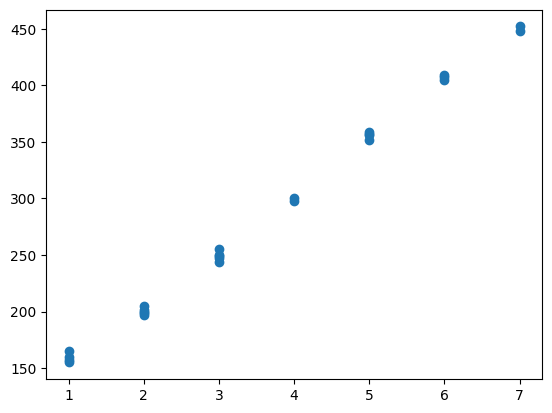

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
features = np.array([1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,5,5,5,5,6,6,6,7,7]) #dataset number of rooms
labels = np.array([155,157,160,165,200,201,205,197,199,244,247,249,250,255,298,300,356,352,359,357,407,409,405,448,452])
#plt.scatter(features,labels)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot a line given slope and y-intercept
def plot_line(slope, intercept):
    # Generate x values
    x = np.linspace(0, 8, 400)
    # Calculate y values based on the slope and intercept
    y = slope * x + intercept

    # Create the plot
    plt.plot(x, y, label=f'y = {slope}x + {intercept}')

    # Add title and labels
    plt.title('Line Plot')
    plt.xlabel('x')
    plt.ylabel('y')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()



### Using the linear regression algorithm in our datase

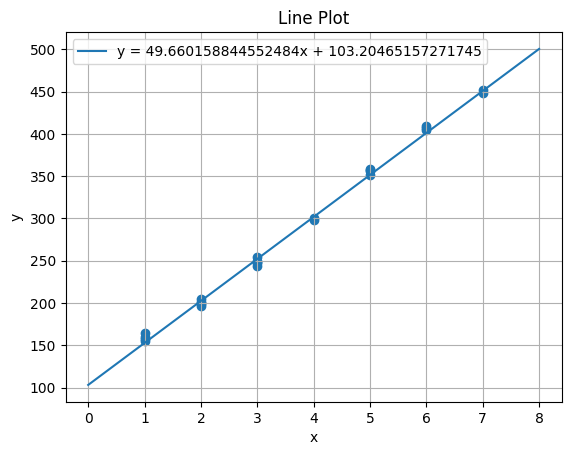

In [ ]:
price_per_room, base_price = linear_regression(features,labels,learning_rate=0.01,epoch=5000)
plt.scatter(features,labels)
plot_line(price_per_room,base_price)

# LOGISTIC REGRESSION

##Psuedocode for logistic trick

PSEUDOCODE FOR THE LOGISTIC TRICK

**Inputs**
1. A logistic classifier with weights a, b, and bias c
2. A point with coordinates (x1
, x2) and label y
3. A small value η (the learning rate)

**Output**
A perceptron with new weights a', b', and bias c' which is at least as good as
the input

**Procedure**
The prediction the perceptron makes at the point is ŷ = σ(ax1 + bx2 + c).

**Return**
The perceptron with the following weights and bias:

a' = a + η(y - ŷ)x1

b' = b + η(y - ŷ)x2

c' = c + η(y - ŷ)

##PSEUDOCODE FOR THE LOGISTIC REGRESSION
###**ALGORITHM**
**Inputs**

1. A dataset of points, labeled 1 and 0
2. A number of epochs, n
3. A learning rate η
**Output**

A logistic classifier consisting of a set of weights and a bias, which fits the
dataset
**Procedure**
1. Start with random values for the weights and bias of the logistic classifier.
2. Repeat many times:
    1. Pick a random data point.
    2. Update the weights and the bias using the logistic trick.
**Return**

The perceptron classifier with the updated weights and bias

## CODING THE LOGISTIC REGRESSION ALGORITHM

Dataset - 4 numerical features, 4 target classes
Sample dataset -
* Sentiment analysis using words named as word A, word B, word C,
word D their number of appearances in the sentence are numerical feature values.
* There are 4 target classes to predict - happy,sad,nuetral,surprised
* Note that each target class has different weights and biases, it is possible the classifier has same weights and biases for all targets but that is not the standard practice

In [ ]:
#importing libraries
import numpy as np
# defining the dataset
## defining the features
features_x = np.array([[1,3,3,4],[2,3,2,1],[3,4,1,5],[1,1,2,3],[2,1,2,4],[1,1,1,5],[3,2,1,2],[2,3,1,4],[4,1,2,3],[5,3,1,1],[2,3,3,4],[4,2,4,5]])
# defining the one-hotted labels
labels_y = np.array([[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,1,0,0],[0,1,0,0],[0,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,1,0],[0,0,0,1],[0,0,0,1],[0,0,0,1]])
#defining the weights each target has different weigths and bias
weights_w = np.array([[1,2,1,2],[3,2,1,3],[1,1,2,3],[3,2,1,2]])
biases_b = np.array([-6,-9,-7,-8])



#### Scores calculation
The score is calculated using the formula

`score = sum(weight_feature_1_for_target_1 * corresponding_feature_value)`

In [ ]:
# Scores calculation
def score_calculation(features,weights,bias):
  scores = []
  for i in features:
    array_x = np.array(i)
    score_row = []
    for j,b in zip(weights,bias):
      array_w = np.array(j)
      score_without_bias = sum(array_x * array_w)
      score_with_bias = score_without_bias + b
      score_row.append(score_with_bias)
      #print(score_row)
    scores.append(score_row)
    #print(scores)
  scores = np.array(scores)
  return scores




In [ ]:
score_array = score_calculation(features_x,weights_w,biases_b)
print(score_array)

[[12 15 15 12]
 [ 6  8  5  8]
 [16 24 17 20]
 [ 5  7  8  5]
 [ 8 13 12 10]
 [ 8 12 12  8]
 [ 6 11  6 10]
 [11 16 12 13]
 [ 8 16 11 14]
 [ 8 16  6 16]
 [13 18 16 15]
 [16 26 22 22]]


#### Softmax Function
1. Calculate the exponential for each score in the score matrix
2. Now sum all scores for each data point

e.g for data point the score of happy, sad, nuetral, surprised are 12,15,15,12 apply exponential for this and sum it `sum_exp = exp(12) + exp(15) + exp(15) + exp(12)`

now calculate the softmax values for each target class for that particular data point

e.g softmax(happy) = exp(12) / sum_exp

In [ ]:

#Softmax calculation
def softmax_function(score):
  softmax = []
  for i in score:
    exp_array = np.exp(i)
    sum_exp_array = np.sum(exp_array)
    softmax_row = exp_array/sum_exp_array
    softmax.append(softmax_row)

  softmax = np.array(softmax)
  #print(softmax)
  return softmax



In [ ]:
softmax_array = softmax_function(score_array)

[[2.37129366e-02 4.76287063e-01 4.76287063e-01 2.37129366e-02]
 [6.19348766e-02 4.57640278e-01 2.27845678e-02 4.57640278e-01]
 [3.29025900e-04 9.80812384e-01 8.94385124e-04 1.79642054e-02]
 [3.39275253e-02 2.50692388e-01 6.81452562e-01 3.39275253e-02]
 [4.73036080e-03 7.02047789e-01 2.58268948e-01 3.49529013e-02]
 [8.99310498e-03 4.91006895e-01 4.91006895e-01 8.99310498e-03]
 [4.87777969e-03 7.23926693e-01 4.87777969e-03 2.66317747e-01]
 [6.26878689e-03 9.30370466e-01 1.70403295e-02 4.63204180e-02]
 [2.93645024e-04 8.75343479e-01 5.89801797e-03 1.18464858e-01]
 [1.67699379e-04 4.99904802e-01 2.26956429e-05 4.99904802e-01]
 [5.65330266e-03 8.39024507e-01 1.13549619e-01 4.17725705e-02]
 [4.37937216e-05 9.64620910e-01 1.76676482e-02 1.76676482e-02]]


#### Cross Entropy

Multiply the actual label with the the natural logarithm of the probablity values and sum them  



In [ ]:
def cross_entropy_function(softmax,labels):
  cross_entropy_row = []
  indiv_entropy = -1 * np.log(softmax) * labels
  for i in indiv_entropy:
    cross_entropy_row.append(sum(i))
  #print(cross_entrop_row)
  cross_entropy = np.array(cross_entropy_row)
  return cross_entropy

In [ ]:
cross_entropy_array = cross_entropy_function(softmax_array,labels_y)

[3.7417345321336875, 2.7816718231374824, 8.019374087919816, 1.3835286387663899, 0.3537538011293066, 0.7112971084777552, 5.323065144132503, 4.072172421993318, 5.133138921873603, 0.6933375937090436, 3.1755153626167147, 4.036020094428718]


In [ ]:
def error_function(labels,softmax):
  return softmax - labels

In [ ]:
error_array = error_function(labels_y,softmax_array)

In [ ]:
def gradient_function(features,error):
  gradient_row = []
  for col in range(error.shape[1]):
    error_col = error[:,col]
    error_col_vector = error_col[:,np.newaxis]
    grad_val = error_col_vector * features
    gradient_row.append(grad_val)
  gradient = np.array(gradient_row)
  return gradient



In [ ]:
gradient_array = gradient_function(features_x,error_array)
for i in gradient_array[0]:
  print(i)

[-0.97628706 -2.92886119 -2.92886119 -3.90514825]
[-1.87613025 -2.81419537 -1.87613025 -0.93806512]
[-2.99901292 -3.9986839  -0.99967097 -4.99835487]
[0.03392753 0.03392753 0.06785505 0.10178258]
[0.00946072 0.00473036 0.00946072 0.01892144]
[0.0089931  0.0089931  0.0089931  0.04496552]
[0.01463334 0.00975556 0.00487778 0.00975556]
[0.01253757 0.01880636 0.00626879 0.02507515]
[0.00117458 0.00029365 0.00058729 0.00088094]
[0.0008385 0.0005031 0.0001677 0.0001677]
[0.01130661 0.01695991 0.01695991 0.02261321]
[1.75174886e-04 8.75874431e-05 1.75174886e-04 2.18968608e-04]


In [ ]:
def weights_update_function(gradient,learning_rate,weights):
  updated_weights_row = []
  for i in range(len(weights)):
    gradient_matrix = gradient[i]
    upd_w = []
    for grad_row in gradient_matrix:
      upd_weight = weights[i] - grad_row*learning_rate
      upd_w.append(upd_weight)
    updated_weights_row.append(upd_w)
    #print(updated_weights_row)
  updated_weights = np.array(updated_weights_row)
  return updated_weights



In [ ]:
weights_update_function(gradient_array,0.5,weights_w)

array([[[ 1.48814353,  3.4644306 ,  2.4644306 ,  3.95257413],
        [ 1.93806512,  3.40709769,  1.93806512,  2.46903256],
        [ 2.49950646,  3.99934195,  1.49983549,  4.49917744],
        [ 0.98303624,  1.98303624,  0.96607247,  1.94910871],
        [ 0.99526964,  1.99763482,  0.99526964,  1.99053928],
        [ 0.99550345,  1.99550345,  0.99550345,  1.97751724],
        [ 0.99268333,  1.99512222,  0.99756111,  1.99512222],
        [ 0.99373121,  1.99059682,  0.99686561,  1.98746243],
        [ 0.99941271,  1.99985318,  0.99970635,  1.99955953],
        [ 0.99958075,  1.99974845,  0.99991615,  1.99991615],
        [ 0.9943467 ,  1.99152005,  0.99152005,  1.98869339],
        [ 0.99991241,  1.99995621,  0.99991241,  1.99989052]],

       [[ 2.76185647,  1.2855694 ,  0.2855694 ,  2.04742587],
        [ 2.54235972,  1.31353958,  0.54235972,  2.77117986],
        [ 1.52878142,  0.03837523,  0.50959381,  0.54796904],
        [ 3.37465381,  2.37465381,  1.74930761,  4.12396142],
      

In [ ]:
def logistic_trick(weights,bias,features,label,learning_rate):
  score_array = score_calculation(features,weights,bias)
  softmax_array = softmax_function(score_array)
  cross_entropy_array = cross_entropy_function(softmax_array,label)
  error_array = error_function(labels_y,softmax_array)
  gradient_array = gradient_function(features,error_array)




 # Simple classification model with scikit learn breast cancer model by converting it ionto pandas data framr

In [ ]:
import pandas
import sklearn
import sklearn.datasets as data_repo # importing all available datasets in scikit learn
,
#import all classification model libraries in sklearn

import sklearn.model_selection
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.naive_bayes

#import performance metrics

import sklearn.metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


#import library for visualization


In [ ]:
#breast cancer dataset
breast_cancer_data = data_repo.load_breast_cancer() # retunrs a bunch object

In [ ]:
# for i in breast_cancer_data:
#   print (i)
print("breast_cancer_data.features_names = ",", ".join(str(x) for x in breast_cancer_data.feature_names),"\n")
print("breast_cancer_data.features_values = \n",breast_cancer_data.data,"\n")
print("breast_cancer_data.target_names = ",", ".join(str(i) for i in breast_cancer_data.target_names),"\n")
print("breast_cancer_data.target_values = \n",breast_cancer_data.target,"\n")




breast_cancer_data.features_names =  mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension 

breast_cancer_data.features_values = 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 

In [ ]:

#Data organization
#breast_cancer_dataframe = pandas.DataFrame(breast_cancer_data) # raw dataframe conversion is not possible

breast_cancer_dataframe = pandas.DataFrame(breast_cancer_data['data'], columns = breast_cancer_data['feature_names']) # data values and column names is mandatory
## add target variable also to data frame
breast_cancer_dataframe["cancer_type"] = breast_cancer_data['target']
# mapping the target numbers 0 and 1 to their corresponding target label
cancer_labels  = {0: 'malignant', 1:'benign'}
breast_cancer_dataframe['cancer_label'] = breast_cancer_dataframe['cancer_type'].map(cancer_labels)

In [ ]:
breast_cancer_dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type,cancer_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [ ]:
# Data spliting


features = breast_cancer_dataframe.iloc[:,0:31]
labels = breast_cancer_dataframe.iloc[:,30]
# simple training and test split
train, test, train_labels, test_labels = sklearn.model_selection.train_test_split(features,labels,random_state=50,test_size=0.30)
# print("training data set : \n",train)
# print("testing data set : \n",test)
# print("training labels set : \n",train_labels)
# print("testing labels set : \n",test_labels)

# k fold split
# k_fold = sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=2)
# # print("kfold output = \n",k_fold.split(features))
# for train_index, test_index in k_fold.split(features):
#   # print("train_index = ",train_index)
#   # print("test_index = ",test_index)
#   train = features.iloc[train_index]
#   test = features.iloc[test_index]
#   train_labels = labels.iloc[train_index]
#   test_labels = labels.iloc[test_index]
print("train = \n",train)
print("test = \n",test)
print("train_labels = \n",train_labels)
print("test_labels = \n",test_labels)

train = 
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
517        19.89         20.26          130.50     1214.0          0.10370   
293        11.85         17.46           75.54      432.7          0.08372   
272        21.75         20.99          147.30     1491.0          0.09401   
338        10.05         17.53           64.41      310.8          0.10070   
506        12.22         20.04           79.47      453.1          0.10960   
..           ...           ...             ...        ...              ...   
70         18.94         21.31          123.60     1130.0          0.09009   
132        16.16         21.54          106.20      809.8          0.10080   
289        11.37         18.89           72.17      396.0          0.08713   
109        11.34         21.26           72.48      396.5          0.08759   
480        12.16         18.03           78.29      455.3          0.09087   

     mean compactness  mean concavity  mean concave p

In [ ]:
# Training the models

#naive bayes model
gaussian_naive_bayes = sklearn.naive_bayes.GaussianNB()
gaussian_naive_bayes_model = gaussian_naive_bayes.fit(train,train_labels)

#random forest
rand_forest_classifier = sklearn.ensemble.RandomForestClassifier()
rand_forest_classifier_model = rand_forest_classifier.fit(train,train_labels)

#decision tree
decision_tree = sklearn.tree.DecisionTreeClassifier()
decision_tree_model = decision_tree.fit(train,train_labels)

In [ ]:
# predictions
test_preds = test.copy()
#naive bayes model
gnb_preds = gaussian_naive_bayes_model.predict(test)
# print("naive bayes prediction : ",gnb_preds)
test_preds["Gaussian_Predictions"] = gnb_preds

#random forest
rf_preds = rand_forest_classifier_model.predict(test)
test_preds["Random_Forest_Predictions"] = rf_preds
# print("randon_forest_prediction : ",rf_preds)
# #decision tree.
dt_preds = decision_tree_model.predict(test)
test_preds["Decision_Tree_Predictions"] = dt_preds
# print("decision_tree_predictions : ",dt_preds)

print(test_preds.iloc[:,-3:])

    Gaussian_Predictions Random_Forest_Predictions Decision_Tree_Predictions
356               benign                    benign                    benign
556               benign                    benign                    benign
283            malignant                 malignant                 malignant
495               benign                    benign                    benign
364               benign                    benign                    benign
..                   ...                       ...                       ...
99             malignant                 malignant                 malignant
455               benign                    benign                    benign
378               benign                    benign                    benign
493               benign                    benign                    benign
31             malignant                 malignant                 malignant

[171 rows x 3 columns]


In [ ]:
#accuarcy evaluation
gnb_accuarcy = sklearn.metrics.accuracy_score(test_labels,gnb_preds)
print("GNB Accuracy = ",gnb_accuarcy)
rf_accuarcy = sklearn.metrics.accuracy_score(test_labels,rf_preds)
print("rf Accuracy = ",rf_accuarcy)
dt_accuarcy = sklearn.metrics.accuracy_score(test_labels,dt_preds)
print("GNB Accuracy = ",dt_accuarcy)

GNB Accuracy =  1.0
rf Accuracy =  1.0
GNB Accuracy =  1.0


In [ ]:
test_preds

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type,Gaussian_Predictions,Random_Forest_Predictions,Decision_Tree_Predictions
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.096030,0.05603,0.2035,0.06501,...,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317,1,benign,benign,benign
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1,benign,benign,benign
283,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.09052,0.1876,0.06684,...,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630,0,malignant,malignant,malignant
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,...,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599,1,benign,benign,benign
364,13.40,16.95,85.48,552.4,0.07937,0.05696,0.021810,0.01473,0.1650,0.05701,...,0.12130,0.16760,0.13640,0.06987,0.2741,0.07582,1,benign,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.05839,0.1879,0.06390,...,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,0,malignant,malignant,malignant
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.03264,0.1375,0.06016,...,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,1,benign,benign,benign
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.02471,0.1792,0.05897,...,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638,1,benign,benign,benign
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028,1,benign,benign,benign


Credit fraud detection ML project

# Credit card fraud detection

Importing required libraries

In [ ]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

importing the data


*  Add the data csv file in the runtime in colab
*  Copy the path of the uploaded file from colab itself



In [ ]:
#read the data set
credit_dataset = pd.read_csv("/content/creditcard.csv")
#check the data
credit_dataset.head()
print("shape of credit card dataset = ",credit_dataset.shape[0],"rows and ",credit_dataset.shape[1]," columns")
print("description of credit card dataset : \n",credit_dataset.describe())

shape of credit card dataset =  284807 rows and  31  columns
description of credit card dataset : 
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  

Understand the distribution of the classes in the data

In [ ]:
#Determine number of fraud and valid cases in the dataset
fraud_data = credit_dataset[credit_dataset["Class"] == 1]
valid_data = credit_dataset[credit_dataset["Class"] == 0]
#Display number of fraud cases and valid cases
print("Number of Fraud cases are {0}\nNumber of Valid cases are {1}".format(len(fraud_data),len(valid_data)))


Number of Fraud cases are 492
Number of Valid cases are 284315


In [ ]:
#check for outliers
if len(fraud_data) + len(valid_data) == len(credit_dataset):
  print("No outliers")
else:
  print("The number of outliers = {}".format(len(credit_dataset) - len(valid_data)-len(fraud_data)))

No outliers


In [ ]:
#Check amount details / stats for valid and fraudulent transactions
print("Amount details of the fradulent transactions : ")
fraud_data.Amount.describe()


Amount details of the fradulent transactions : 


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
print("Amount details of the valid transactions : ")
valid_data.Amount.describe()

Amount details of the valid transactions : 


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


Creating a colrelation matrix to understand the relationship between the input features

Default type of correlation matrix is Pearson Type

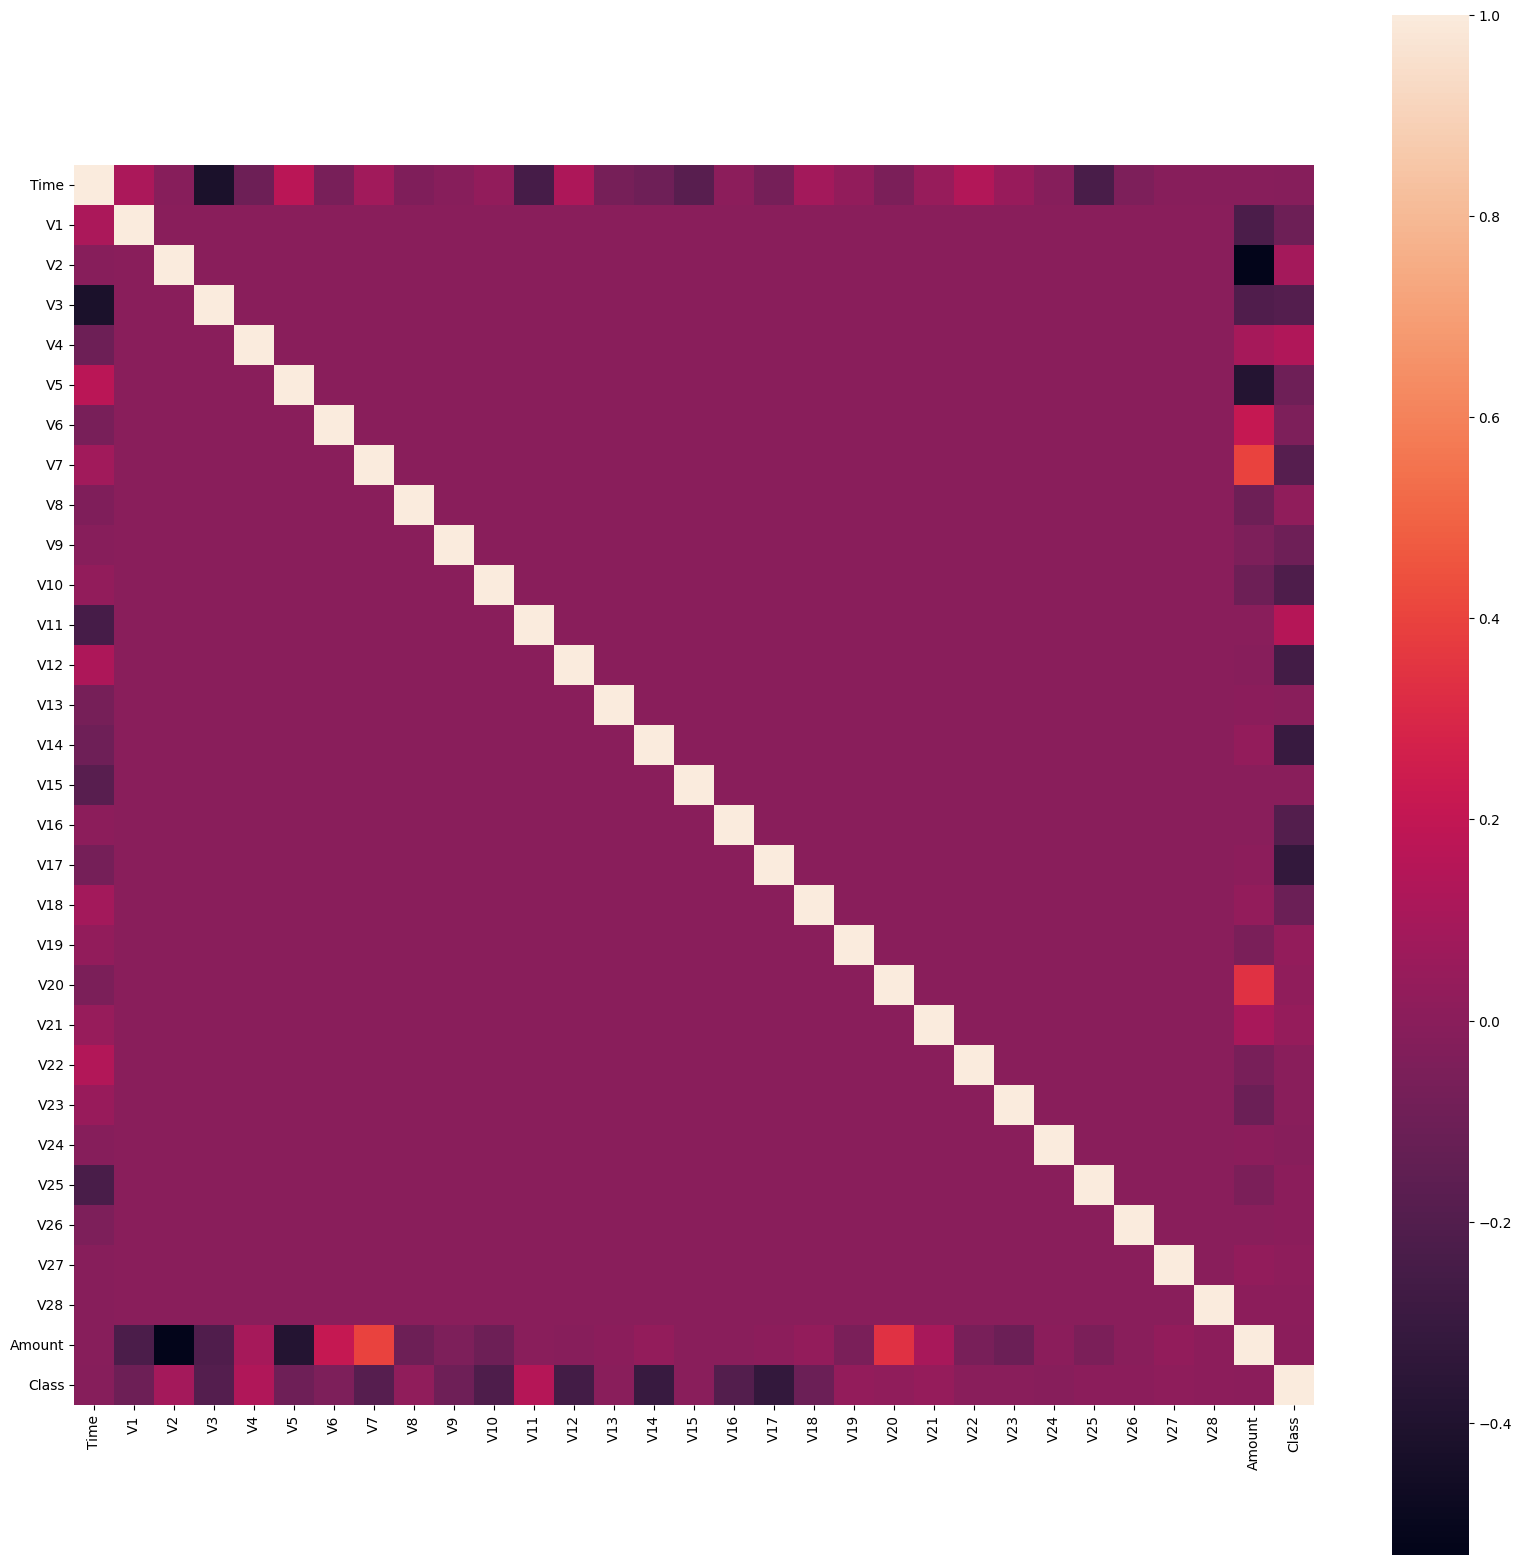

In [ ]:
corr_matrix = credit_dataset.corr() #returns array object with correlation coefficient for each feature pair.
# print(corr_matrix)

# creating heatmap visualization for the corelation matrix

corr_figure = plt.figure(figsize=(20,20)) #size of figure
sns.heatmap(corr_matrix,square=True)
plt.show()

Dividing the data into input parameters and output values

In [ ]:
#Getting features-X and target-Y from dataset
features_X = credit_dataset.drop(['Class'],axis=1) # remove target varaible from data set
label_Y = credit_dataset["Class"]
# converting data frame into arrays containing only values for processing
features_X_array = features_X.values
label_Y_array = label_Y.values


Splitting to training and testing datasets

In [ ]:
#use already imported train test split function from sklearn
feature_X_train,features_X_test,label_Y_train,label_Y_test = sklearn.model_selection.train_test_split(features_X,label_Y,test_size = 0.25,random_state = 42)

Creating ML models for prediction

In [ ]:
#Training the models

#naive bayes model
gaussian_naive_bayes = sklearn.naive_bayes.GaussianNB()
gaussian_naive_bayes_model = gaussian_naive_bayes.fit(feature_X_train,label_Y_train)

#random forest
rand_forest_classifier = sklearn.ensemble.RandomForestClassifier()
rand_forest_classifier_model = rand_forest_classifier.fit(feature_X_train,label_Y_train)

#decision tree
decision_tree = sklearn.tree.DecisionTreeClassifier()
decision_tree_model = decision_tree.fit(feature_X_train,label_Y_train)

Prediction step

In [ ]:

#naive bayes model
gnb_preds = gaussian_naive_bayes_model.predict(features_X_test)
# print("naive bayes prediction : ",gnb_preds)

#random forest
rf_preds = rand_forest_classifier_model.predict(features_X_test)
# print("randon_forest_prediction : ",rf_preds)

# #decision tree.
dt_preds = decision_tree_model.predict(features_X_test)
# print("decision_tree_predictions : ",dt_preds)


Calculate evaluation metrics

In [ ]:
n_fraud = len(fraud_data)

n_gnb_errors = (gnb_preds != label_Y_test).sum()
n_rf_errors = (rf_preds != label_Y_test).sum()
n_dt_errors = (dt_preds != label_Y_test).sum()

#accuarcy evaluation
gnb_accuarcy = sklearn.metrics.accuracy_score(label_Y_test,gnb_preds)
print("GNB Accuracy = ",gnb_accuarcy)
rf_accuarcy = sklearn.metrics.accuracy_score(label_Y_test,rf_preds)
print("rf Accuracy = ",rf_accuarcy)
dt_accuarcy = sklearn.metrics.accuracy_score(label_Y_test,dt_preds)
print("DT Accuracy = ",dt_accuarcy)

#precision evaluation
print("\n")
gnb_precision = sklearn.metrics.precision_score(label_Y_test,gnb_preds)
print("GNB precision = ",gnb_precision)
rf_precision = sklearn.metrics.precision_score(label_Y_test,rf_preds)
print("rf precision = ",rf_precision)
dt_precision = sklearn.metrics.precision_score(label_Y_test,dt_preds)
print("DT precision = ",dt_precision)

#recall evaluation
print("\n")
gnb_recall = sklearn.metrics.recall_score(label_Y_test,gnb_preds)
print("GNB recall = ",gnb_recall)
rf_recall = sklearn.metrics.recall_score(label_Y_test,rf_preds)
print("rf recall = ",rf_recall)
dt_recall = sklearn.metrics.recall_score(label_Y_test,dt_preds)
print("DT recall = ",dt_recall)

#accuarcy evaluation
print("\n")
gnb_f1_score = sklearn.metrics.f1_score(label_Y_test,gnb_preds)
print("GNB f1 score = ",gnb_f1_score)
rf_f1_score = sklearn.metrics.f1_score(label_Y_test,rf_preds)
print("rf f1 score = ",rf_f1_score)
dt_f1_score = sklearn.metrics.f1_score(label_Y_test,dt_preds)
print("DT f1 score = ",dt_f1_score)


GNB Accuracy =  0.9931181708378978
rf Accuracy =  0.9995786635206876
DT Accuracy =  0.9991854161399961


GNB precision =  0.13957934990439771
rf precision =  0.9368421052631579
DT precision =  0.7235772357723578


GNB recall =  0.6460176991150443
rf recall =  0.7876106194690266
DT recall =  0.7876106194690266


GNB f1 score =  0.22955974842767296
rf f1 score =  0.8557692307692307
DT f1 score =  0.7542372881355932


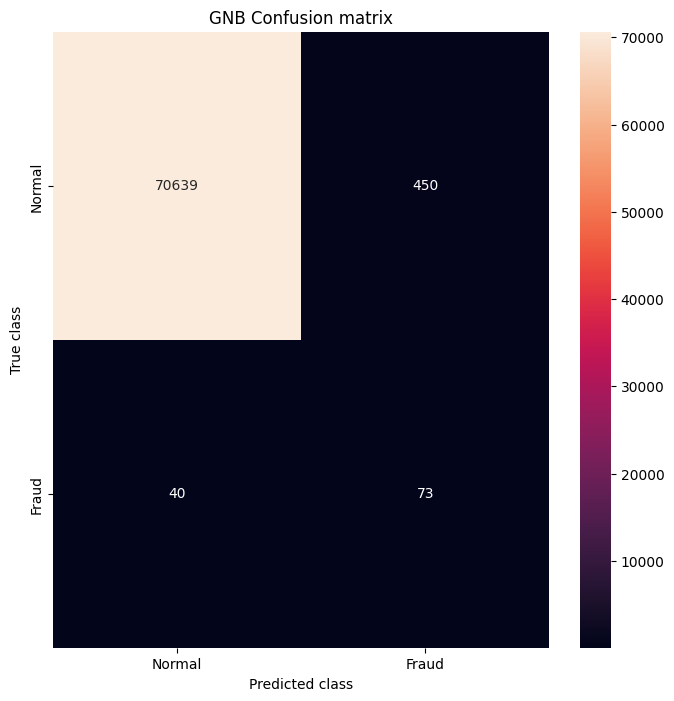

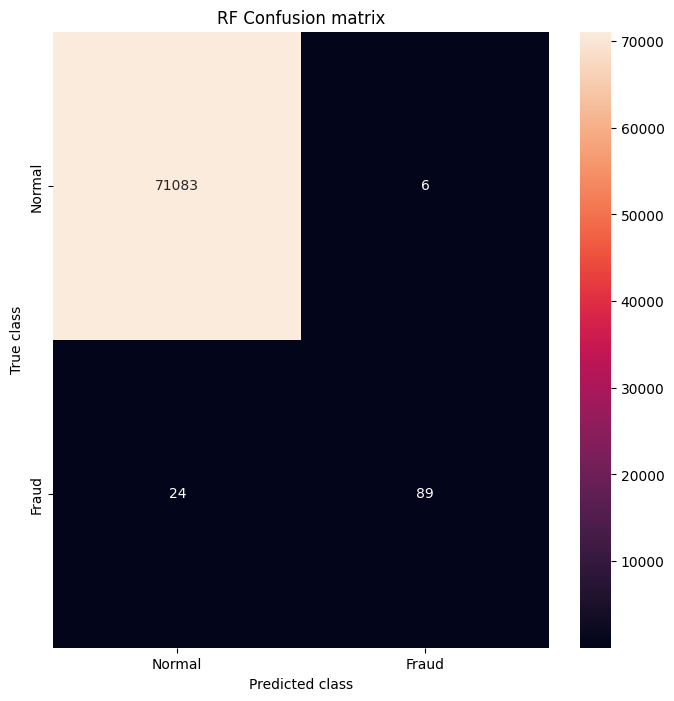

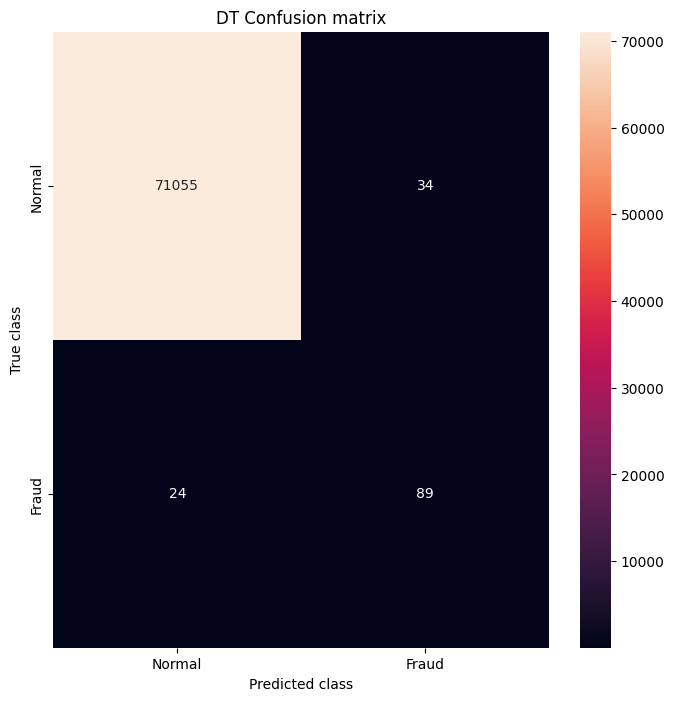

In [ ]:
# printing the confusion matrix for Naive bayes
LABELS = ['Normal', 'Fraud']
gnb_conf_matrix = confusion_matrix(label_Y_test, gnb_preds)
plt.figure(figsize =(8, 8))
sns.heatmap(gnb_conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("GNB Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# printing the confusion matrix for Random forest
LABELS = ['Normal', 'Fraud']
gnb_conf_matrix = confusion_matrix(label_Y_test, rf_preds)
plt.figure(figsize =(8, 8))
sns.heatmap(gnb_conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("RF Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# printing the confusion matrix for Decision Tree
LABELS = ['Normal', 'Fraud']
gnb_conf_matrix = confusion_matrix(label_Y_test, dt_preds)
plt.figure(figsize =(8, 8))
sns.heatmap(gnb_conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("DT Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



#Build a Deep Learning based Medical Diagnoser

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/adil200/Medical-Diagnoser/main/medical_data.csv')
data.head()

,Patient_Problem,Disease,Prescription
0,"Constant fatigue and muscle weakness, struggli...",Chronic Fatigue Syndrome,"Cognitive behavioral therapy, graded exercise ..."
1,"Frequent severe migraines, sensitivity to ligh...",Migraine with Aura,"Prescription triptans, avoid triggers like bri..."
2,"Sudden weight gain and feeling cold, especiall...",Hypothyroidism,Levothyroxine to regulate thyroid hormone levels.
3,"High fever, sore throat, and swollen lymph nod...",Mononucleosis,"Rest and hydration, ibuprofen for pain."
4,"Excessive thirst and frequent urination, dry m...",Diabetes Mellitus,Insulin therapy and lifestyle changes.


In [ ]:
#tokenizing
tokenizer = Tokenizer(num_words=5000 , oov_token = "<OOV>")
tokenizer.fit_on_texts(data['Patient_Problem'])

In [ ]:
sequences = tokenizer.texts_to_sequences(data['Patient_Problem'])